In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
import warnings

In [13]:
df = pd.read_csv('C:/Users/jaya2/Downloads/greendestination (1) (1).csv')


In [14]:
# Check for columns 
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# CLEANING THE DATA

In [15]:
# Check for null values and basic statistics
print(df.isnull().sum())
print(df.describe())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [16]:
# Drop rows with missing values in 'Attrition', 'Age', 'YearsAtCompany', and 'Income' columns
df = df.dropna(subset=['Attrition', 'Age', 'YearsAtCompany', 'MonthlyIncome'])


In [17]:
# Calculate total number of employees
total_employees = len(df)
# Calculate number of employees who left
employees_left = df[df['Attrition'] == 'Yes'].shape[0]
# Calculate the attrition rate
attrition_rate = (employees_left / total_employees) * 100
print(f"The attrition rate is {attrition_rate:.2f}%")

The attrition rate is 16.12%


# EDA BETWEEN ATTRITION & FACTORS

In [18]:
# Checking  'Attrition' is binary for analysis
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# HISTOGRAM CHART 

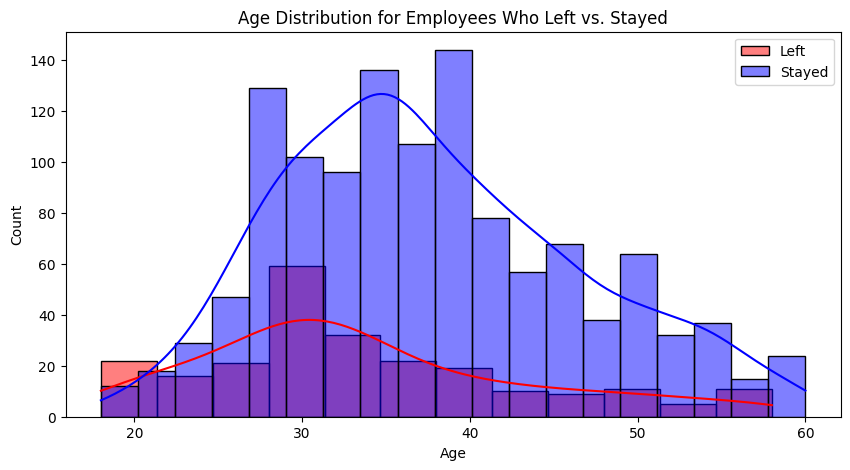

In [19]:
#Visualizing the Relationship Between Age and Attrition
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Attrition'] == 1]['Age'], color="red", label="Left", kde=True)
sns.histplot(df[df['Attrition'] == 0]['Age'], color="blue", label="Stayed", kde=True)
plt.title('Age Distribution for Employees Who Left vs. Stayed')
plt.legend()
plt.show()

# BOX PLOT

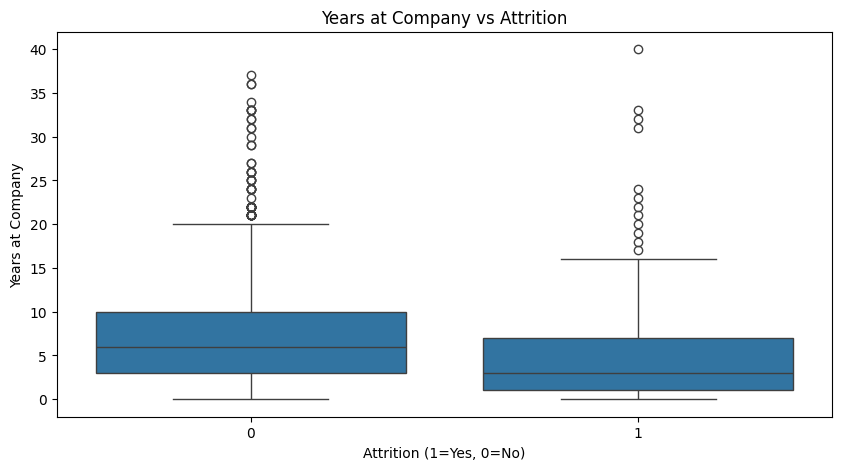

In [20]:
#Visualizing the Relationship Between Years at the Company and Attrition
plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Years at Company vs Attrition')
plt.xlabel('Attrition (1=Yes, 0=No)')
plt.ylabel('Years at Company')
plt.show()

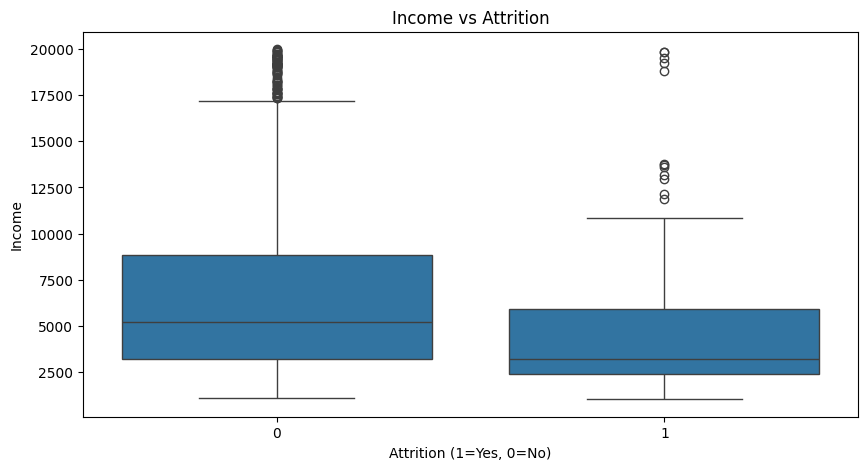

In [21]:
#Visualizing the Relationship Between Income and Attrition
plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Income vs Attrition')
plt.xlabel('Attrition (1=Yes, 0=No)')
plt.ylabel('Income')
plt.show()

In [22]:
#Calculate and Display Correlations
correlation_matrix = df[['Attrition', 'Age', 'YearsAtCompany', 'MonthlyIncome']].corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                 Attrition       Age  YearsAtCompany  MonthlyIncome
Attrition        1.000000 -0.159205       -0.134392      -0.159840
Age             -0.159205  1.000000        0.311309       0.497855
YearsAtCompany  -0.134392  0.311309        1.000000       0.514285
MonthlyIncome   -0.159840  0.497855        0.514285       1.000000


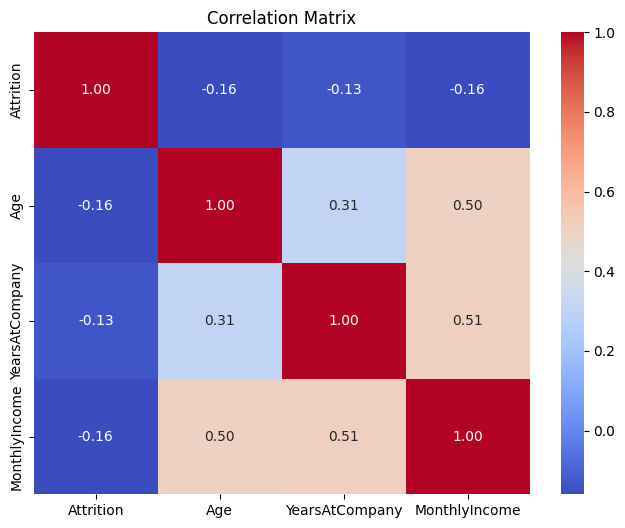

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  VISUALIZE PATTERNS

In [39]:
#Encode 'Attrition' as binary
df['Attrition_Encoded'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [41]:
#Calculate Overall Attrition Rate
total_employees = len(df)
employees_left = df['Attrition_Encoded'].sum()
attrition_rate = (employees_left / total_employees) * 100
print(f"Total Employees: {total_employees}")
print(f"Employees Left: {employees_left}")
print(f"Overall Attrition Rate: {attrition_rate:.2f}%")


Total Employees: 1470
Employees Left: 0
Overall Attrition Rate: 0.00%


In [49]:
report = pd.DataFrame({
    'Metric': ['Average Age', 'Average Income', 'Average Years At Company'],
    'Employees_Left': [
        df[df['Attrition_Encoded'] == 1]['Age'].mean(),
        df[df['Attrition_Encoded'] == 1]['MonthlyIncome'].mean(),
        df[df['Attrition_Encoded'] == 1]['YearsAtCompany'].mean()
    ],
    'Employees_Stayed': [
        df[df['Attrition_Encoded'] == 0]['Age'].mean(),
        df[df['Attrition_Encoded'] == 0]['MonthlyIncome'].mean(),
        df[df['Attrition_Encoded'] == 0]['YearsAtCompany'].mean()
    ]
})

In [50]:
#Correlation Analysis with Attrition
correlation_matrix = df[['Attrition_Encoded', 'Age', 'YearsAtCompany', 'MonthlyIncome']].corr()
attrition_correlation = correlation_matrix['Attrition_Encoded'][['Age', 'YearsAtCompany', 'MonthlyIncome']]


In [51]:
#Display Findings
print("====== Attrition Analysis Report ======")
print(f"1. Overall Attrition Rate: {attrition_rate:.2f}%")
print("\n2. Average Metrics for Employees Who Left vs. Stayed:\n")
print(report)
print("\n3. Correlation of Factors with Attrition:\n")
print(attrition_correlation)
print("\nInterpretation of Correlations:")
print("- Positive correlation means that as the factor increases, attrition likelihood also increases.")
print("- Negative correlation suggests that as the factor increases, attrition likelihood decreases.")
print("=========================================")

====== Attrition Analysis Report ======
1. Overall Attrition Rate: 0.00%

2. Average Metrics for Employees Who Left vs. Stayed:

                     Metric  Employees_Left  Employees_Stayed
0               Average Age             NaN         36.923810
1            Average Income             NaN       6502.931293
2  Average Years At Company             NaN          7.008163

3. Correlation of Factors with Attrition:

Age              NaN
YearsAtCompany   NaN
MonthlyIncome    NaN
Name: Attrition_Encoded, dtype: float64

Interpretation of Correlations:
- Positive correlation means that as the factor increases, attrition likelihood also increases.
- Negative correlation suggests that as the factor increases, attrition likelihood decreases.
